Name : Justin Joseph

Student Id : 8786567

Part A

In [15]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score, recall_score, mean_squared_error, mean_absolute_error, r2_score

In [16]:
df = pd.read_csv('creditcard.csv')

df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [17]:
df.rename(columns={'Class': 'IsFraud'}, inplace=True)
df.isnull().values.any()
df.drop_duplicates(inplace=True)

In [18]:
scaler = StandardScaler()
df['Amount'] = scaler.fit_transform(df['Amount'].values.reshape(-1, 1))
df['Time'] = scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,IsFraud
0,-1.996823,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244200,0
1,-1.996823,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342584,0
2,-1.996802,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.158900,0
3,-1.996802,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.139886,0
4,-1.996781,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073813,0


In [19]:
X = df.drop(columns=['Time', 'IsFraud'])
y = df['IsFraud']

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 1.00
Confusion Matrix:
[[84972    12]
 [   60    74]]
Precision: 0.86
Recall: 0.55
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     84984
           1       0.86      0.55      0.67       134

    accuracy                           1.00     85118
   macro avg       0.93      0.78      0.84     85118
weighted avg       1.00      1.00      1.00     85118



The dataset is clearly unbalanced, with a great deal more valid transactions (class 0) than fraudulent transactions (class 1), despite the high accuracy of the model. Because of the model's high level of precision, it frequently gets transactions classified as fraudulent right. The recall, however, is comparatively small, suggesting that the algorithm misses a significant portion of actual fraudulent transactions.

Part B

In [21]:
in_df = pd.read_csv('insurance.csv')
in_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [22]:
in_df.isnull().values.any()
in_df.duplicated().sum()
in_df.drop_duplicates(inplace=True)
en= LabelEncoder()
in_df['sex']= en.fit_transform(in_df['sex'])
in_df['smoker']= en.fit_transform(in_df['smoker'])
in_df['region']= en.fit_transform(in_df['region'])

in_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


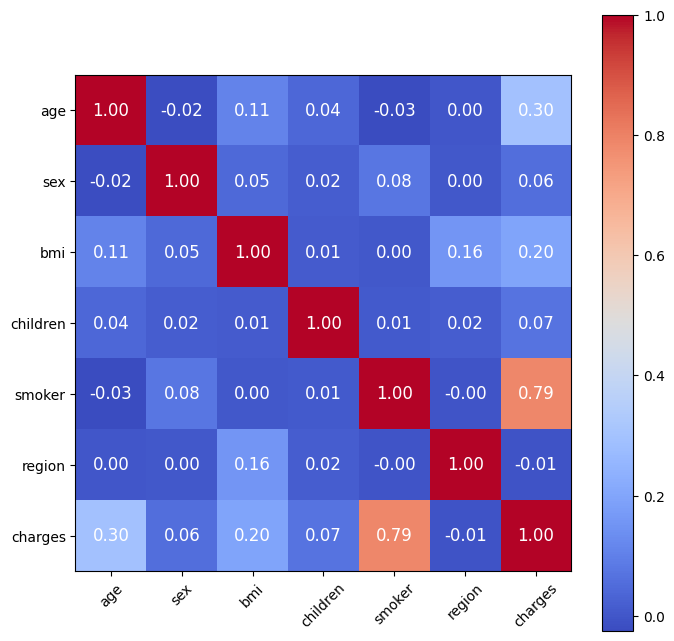

In [27]:
correlation_matrix = in_df.corr()

plt.figure(figsize=(8, 8))

plt.imshow(correlation_matrix, cmap='coolwarm', interpolation='nearest')

for i in range(len(correlation_matrix)):
    for j in range(len(correlation_matrix)):
        text = "{:.2f}".format(correlation_matrix.iloc[i, j])
        plt.text(j, i, text, ha='center', va='center', color='white', fontsize=12)

plt.colorbar()

plt.xticks(range(len(correlation_matrix.columns)), correlation_matrix.columns, rotation=45)
plt.yticks(range(len(correlation_matrix.columns)), correlation_matrix.columns)

plt.show()

In [28]:
X = in_df.drop(columns=['charges'])
y = in_df['charges']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LinearRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 38935221.01
R-squared (R2): 0.77


MSE of 38935221.01 and an R2 of 0.77 suggest that the linear regression model provides a reasonable fit to the data

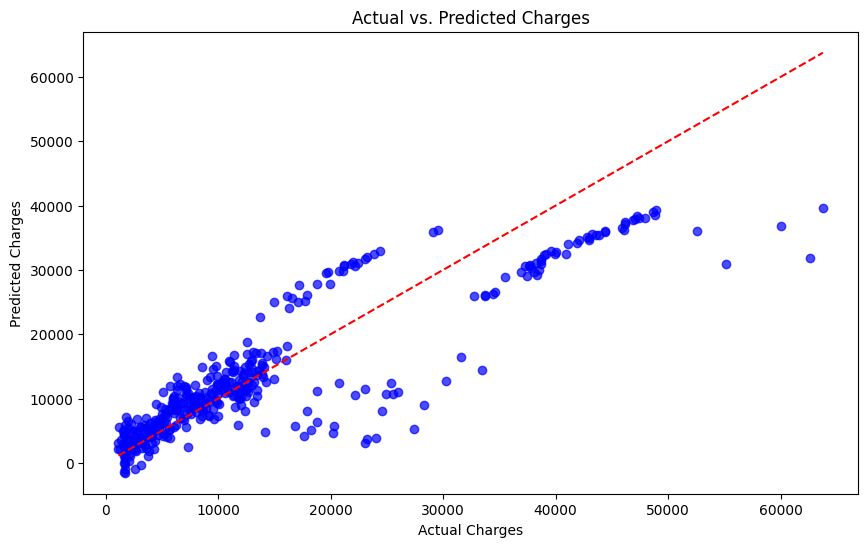

In [30]:
comparison_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

plt.figure(figsize=(10, 6))
plt.scatter(comparison_df['Actual'], comparison_df['Predicted'], color='blue', alpha=0.7)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs. Predicted Charges')
plt.show()

In [32]:
print(f'MAE : {mean_absolute_error(y_test, y_pred)}') 
print( f'MSE : {mean_squared_error(y_test, y_pred)}')
print(f'RMSE : { np.sqrt(mean_squared_error(y_test, y_pred))}')
print(f'R-Squared : {r2_score(y_test, y_pred)}')

MAE : 4182.803777070157
MSE : 38935221.01064076
RMSE : 6239.809372940872
R-Squared : 0.7724652729621758


Although the performance of the linear regression model is acceptable, accounting for nearly 77.25% of the variance in the "charges" based on the provided attributes, there is still space for improvement as indicated by the relatively high mean absolute error and root mean squared error.